# Exercises - lecture 5

## GIT

### Create an account on Github

https://github.com/CorbinMach

### Create a project and add this notebook and your solutions file to it

https://github.com/CorbinMach/Python_for_Biologists

### As you solve the exercises, use commits whenever you have solved part of an exercise (or even more often if you want to)

ok

## String formatting and saving plots

### Take the 300 2D Gauss plots from the video creation lecture and the 300 file names that begin with the integer of the number of the plot in a format of 4 digits. For example: 0000 for the first width 0001 for the second one etc. Then add the intensity and the width to the filename:
NUMBER_INTENSITY_WIDTH with the formatting:

0000_1.0_01.00

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.misc
import scipy as sp
import math
import matplotlib
from matplotlib import cm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [2]:
import os

def safe_mkdir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [4]:
figsizesmall = (8,6)
figuresize = (10,6)
figsizelarge = (15,10)
figsize_4c = (15,6)

In [5]:
# Meshes:
accuracy = 0.04
x = np.arange(-5, 5, accuracy)
y = np.arange(-5, 5, accuracy)

X,Y = np.meshgrid(x,y)

In [6]:
# 2D Gauss function:
def gauss_2d(x, y, I, width):
    return I*np.exp(-x**2/width**2 + -y**2/width**2)

In [27]:
# Gauss parameters
nplots = 300
intensity = 1.0
widths = np.linspace(1.0, 10.0, nplots)

In [8]:
# Plot parameters
position = 1.07
lwidth = 1.5
lpad = -10

In [49]:
folder = './video/'
safe_mkdir(folder)
for i, width in enumerate(widths):
    fname = f"{i:04d}"
    data = gauss_2d(X,Y, intensity, width)
    plt.figure(figsize=figuresize)
    im = plt.pcolor(X,Y,data, cmap=cm.inferno, vmin=0, vmax=1, shading='auto')
    cbar = colorbar(im)
    cbar.set_label(r'$gauss\_2d$', rotation=0, labelpad=lpad, y=position)
   
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.text(-4.7, 4.0, f'width = {widths[i]:.2f}', fontsize=16, color='white')
    
    plt.savefig(folder + fname + '.png', bbox_inches='tight', dpi=300)
    plt.close()

### Loop over the width array, create the plots and save them with the new filenames 

In [50]:
output_folder = './output/'
input_folder = './video/'
safe_mkdir(output_folder)
# Iterate through the files in the folder
for i in range(300):
    # Current file name
    current_name = f"{i:04d}"

    # Calculate WIDTH based on the index
    current_width = widths[i]

    # New file name format: NUMBER_INTENSITY_WIDTH
    new_name = f"{current_name}_1.0_{current_width:.2f}.png"

    # Full paths for old and new file names
    old_path = os.path.join(input_folder, f"{current_name}.png")
    new_path = os.path.join(output_folder, new_name)

    # Rename the file
    os.rename(old_path, new_path)

Same code, but in reverse:

In [51]:
output_folder = './video/'
input_folder = './output/'
safe_mkdir(output_folder)
# Iterate through the files in the folder
for i in range(300):
    # Current file name
    current_name = f"{i:04d}"

    # Restore old filename
    original_name = f"{current_name}.png"

    # Full paths for old and new file names
    old_path = os.path.join(input_folder, f"{current_name}_1.0_{widths[i]:.2f}.png")
    new_path = os.path.join(output_folder, original_name)

    # Rename the file
    os.rename(old_path, new_path)

In [54]:
# Specify the folders and names
i = 299
short_folder = './video/'
long_folder = './output/'
short_name = "0000.png"
long_name = "0000_1.0_1.00.png"
short_path = short_folder + short_name
long_path = long_folder + long_name
widths = np.linspace(1.0, 10.0, nplots)

# If clause to decide which direction to move files
if os.path.exists(short_path):
    for i in range(300):
        # Current file name
        current_name = f"{i:04d}.png"

        # Calculate WIDTH based on the index
        current_width = widths[i]

        # New file name
        new_name = f"{i:04d}_1.0_{current_width:.2f}.png"

        # Full paths for old and new file names
        old_path = os.path.join(short_folder, current_name)
        new_path = os.path.join(long_folder, new_name)
        
        # Rename the file
        os.rename(old_path, new_path)
    
    print("Option 1: Files in short_folder renamed and moved to long_folder.")
    
elif os.path.exists(long_path):
    for i in range(300):
        
        # Calculate WIDTH based on the index
        current_width = widths[i]
        
        # Current file name
        current_name = f"{i:04d}_1.0_{current_width:.2f}.png"

        # New file name
        new_name = f"{i:04d}.png"

        # Full paths for old and new file names
        old_path = os.path.join(long_folder, current_name)
        new_path = os.path.join(short_folder, new_name)
        
        # Rename the file
        os.rename(old_path, new_path)
        
    print("Option 2: Files in long_folder renamed and moved to short_folder.")
    
else:
    print("Option 3: Error - Neither folder contains the correct files.")

Option 2: Files in long_folder renamed and moved to short_folder.


In [36]:
print(short_path)

video\0299.png


In [37]:
print(long_path)

output\0299_1.0_10.00.png


In [34]:
from pathlib import Path

## Video creation
Ideally, create a movie with your own data and your own images and prepare it for the tutorials.
If you do not have datasets available do the following:

### Use the example from the lecture and use different -preset settings and compare file sizes

### Bonus: Try out different crf settings and compare video quality and file sizes

## Notebook structure

In this exercise I want you to apply 3 main things:

1) Use the PEP8 standard throughout the exercises

2) While you are programming make use of the Keyboard shortcuts covered in the lecture

3) Structure the following code in a way that it becomes more readable, PEP8 conforming and so that the concerns are separated. In the end, consider what the end result of this code is and potentially delete lines of code that are not needed for the end result. All while maintaining the functionality of the code. This is an exercise to put you into the position of getting an undocumented code from somebody that is not well written and you need to understand it. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from scipy.interpolate import interp1d, CubicSpline

In [11]:
figsizesmall = (8,6)
figuresize = (10,6)
plt.rcParams['pcolor.shading']='auto'

In [12]:
xmax = 10
x = np.arange(0,xmax)

In [13]:
y = np.sin(x)

interp_x = np.linspace(0,xmax-1,100)
interp_y_np = np.interp(interp_x,x,y)

f_1d = interp1d(x,y)
interp_y_1d = f_1d(interp_x)

cs = CubicSpline(x, y)
interp_y_cs = cs(interp_x)

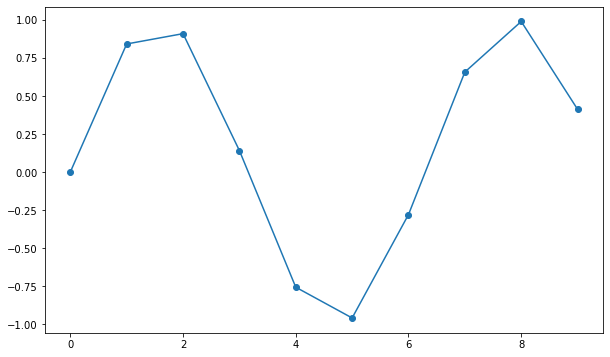

In [14]:
plt.figure(figsize=figuresize)
plt.plot(x,y, marker='o')
plt.show()

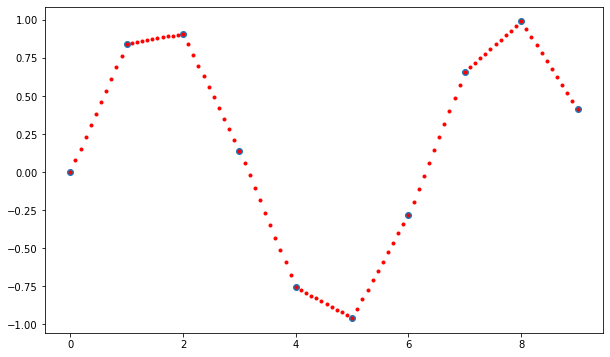

In [15]:
plt.figure(figsize=figuresize)
plt.plot(x, y, 'o')
plt.plot(interp_x, interp_y_np, '.', color='red')
plt.show()

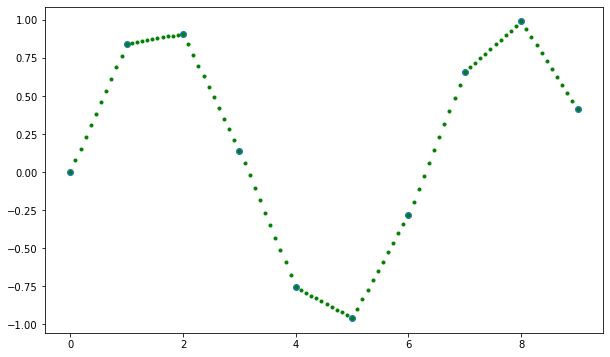

In [16]:
plt.figure(figsize=figuresize)
plt.plot(x, y, 'o')
plt.plot(interp_x, interp_y_1d, '.', color='green')
plt.show()

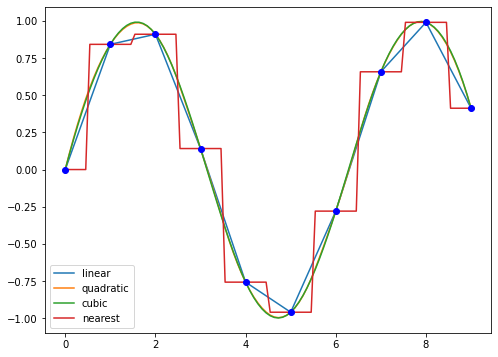

In [17]:
interp_x = np.linspace(0,xmax-1,100)
plt.figure(figsize=figsizesmall)
for k in ['linear', 'quadratic', 'cubic', 'nearest']: 
    f = interp1d(x,y,kind=k)
    interp_y_1d = f(interp_x)
    plt.plot(interp_x, interp_y_1d, label=k)
plt.plot(x, y, 'o', color='blue')
plt.legend()

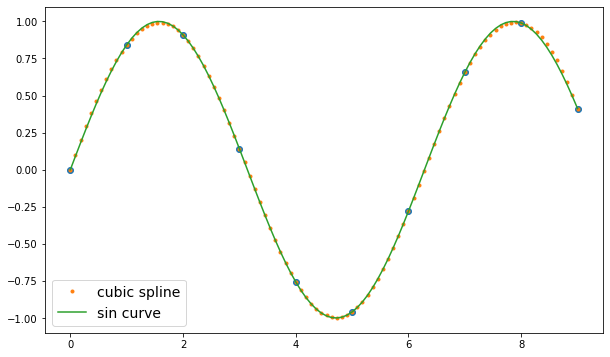

In [18]:
plt.figure(figsize=figuresize)
plt.plot(x, y, 'o')
plt.plot(interp_x, interp_y_cs, '.', label='cubic spline')
plt.plot(interp_x, np.sin(interp_x), label='sin curve')
plt.legend(fontsize=14)
plt.show()